### 필요한 library import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import scipy as sp
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor 

### house_price.csv 파일 불러오기

In [4]:
data=pd.read_csv('../../Session/Session4/house_price.csv')

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


### heatmap을 통한 MEDV, CAT.MEDV 상관관계 분석

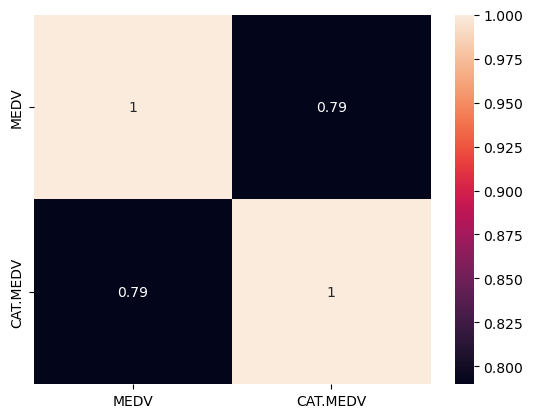

In [7]:
sns.heatmap(data[['MEDV', 'CAT.MEDV']].corr(),annot = True)
plt.show()

MEDV는 회귀 모델에서 사용될 반응 변수 - CAT.MEDV는 MEDV에서 파생된 변수(상관관계 높음)이기 때문에 삭제

In [9]:
data.drop('CAT.MEDV', axis=1, inplace=True)

In [53]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 설명변수 x와 반응변수 y 나누기

In [55]:
x=data.loc[:,'CRIM':'LSTAT']
y=data[['MEDV']]

In [13]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [14]:
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 설명변수의 다중공선성 확인 (상관계수 확인 - heatmap)

<Axes: >

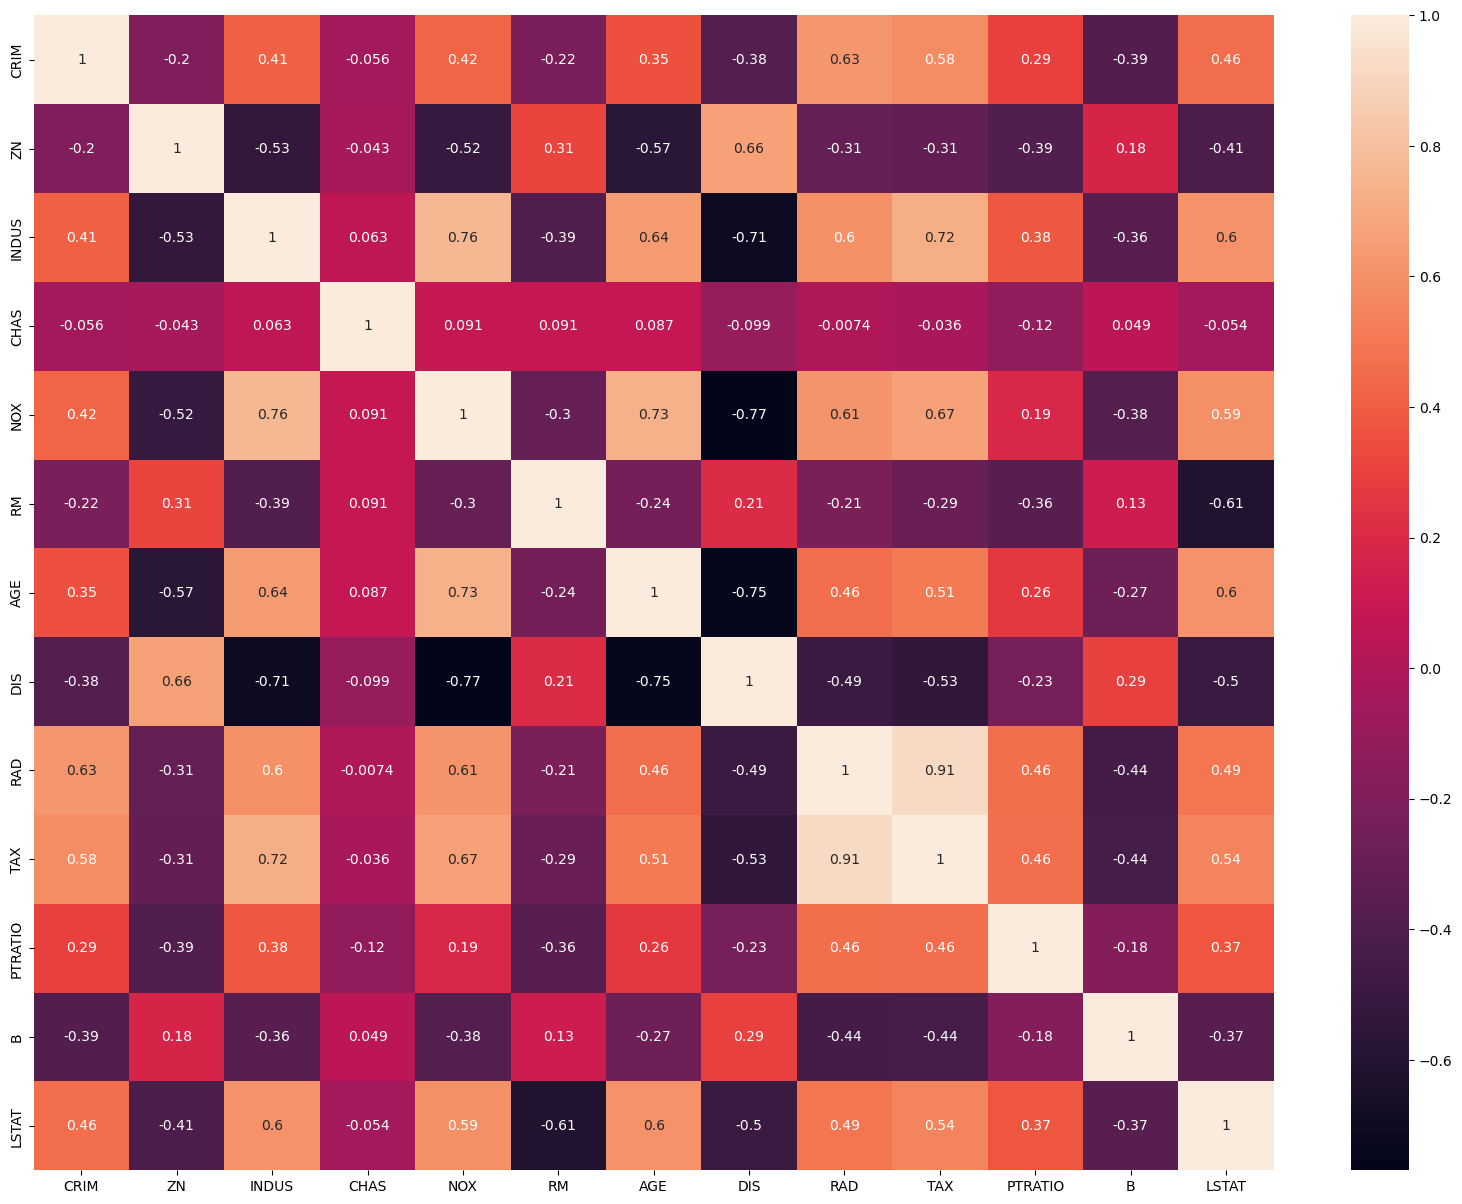

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr(),annot=True)

너무 많아서 복잡함 - 숫자도 잘 안 보임 - 특정 수치(상관계수 절대치 0.7)를 기준으로 상관관계 높은지 낮은지 구분해 봄

<Axes: >

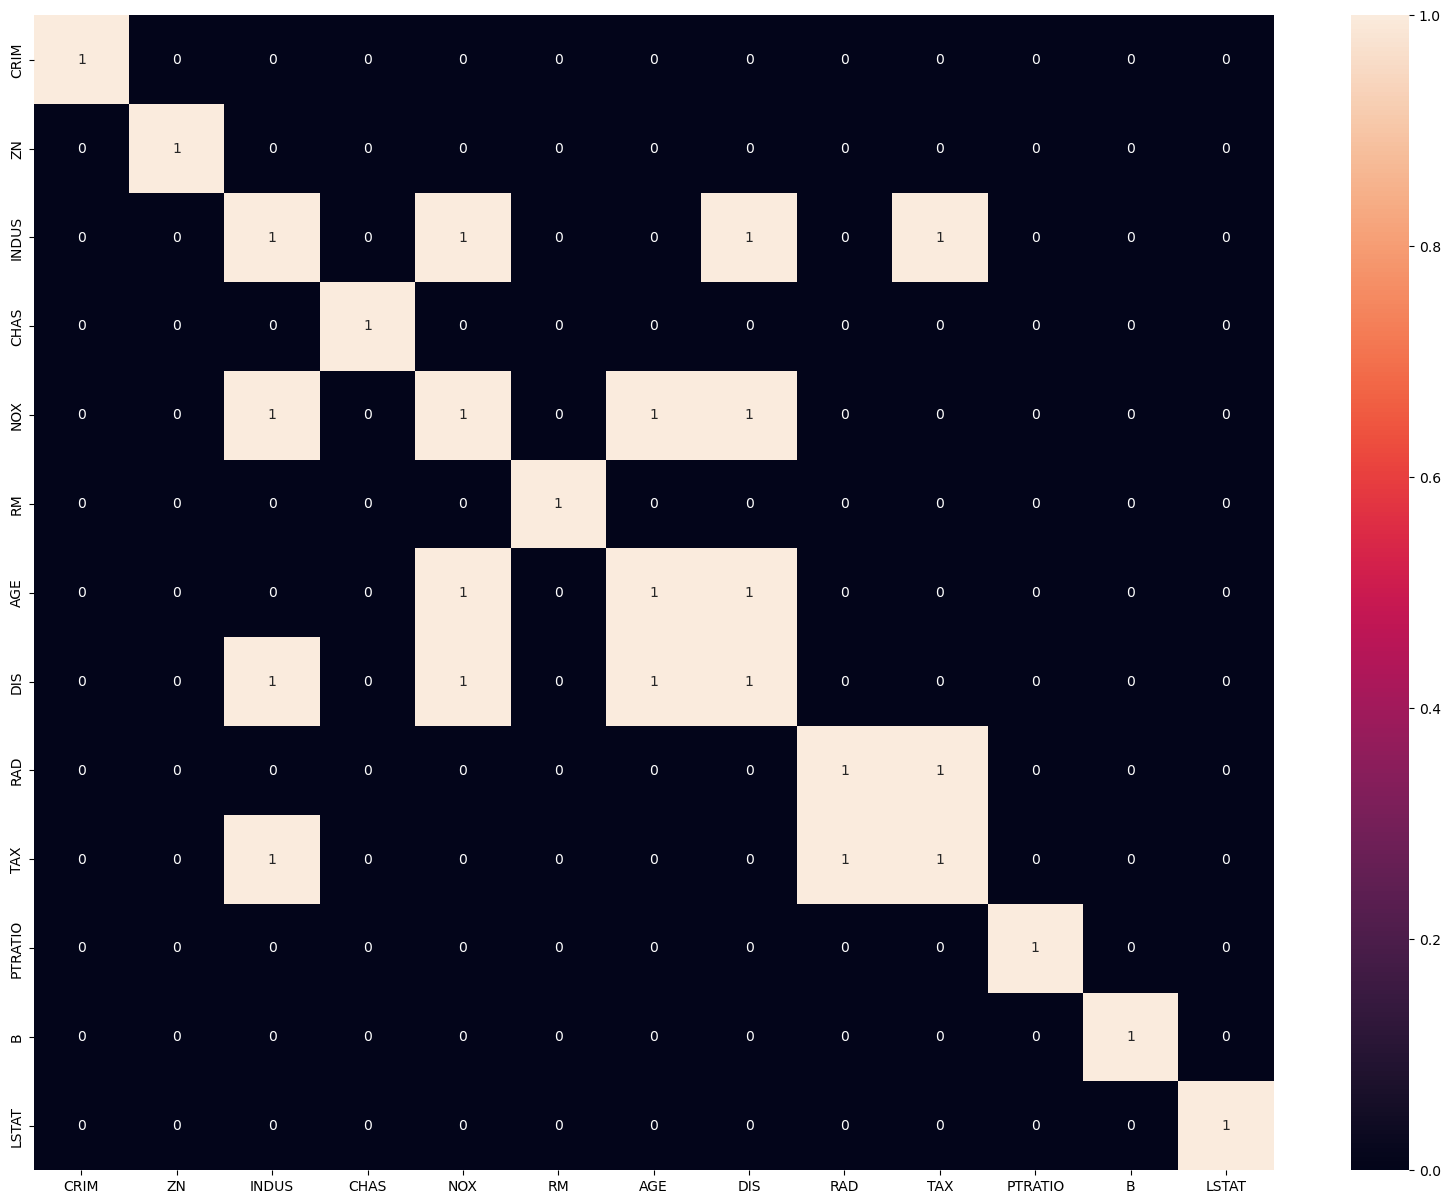

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap ((x.corr()>=0.7) | (x.corr()<=-0.7), annot=True)

NOX-INDUS, AGE-NOX, DIS -INDUS, DIS-NOX, DIS-AGE, TAX-INDUS, TAX-RAD 총 7개의 변수 관계에서 절대치 0.7 이상의 상관관계 보임
- NOX, DIS, INDUS, TAX, RAD 피처들에 유의해 보자

VIF를 통한 검증 추가

In [21]:
def vif(x):
    vif_data = pd.DataFrame()
    vif_data["Features"] = x.columns
    vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    print(vif_data)
vif(x)

   Features        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


PTRATIO, RM, NOX, TAX 변수의 VIF가 특히 높게 나온다 - 차례대로 제거해 보면서 VIF 변화를 보겠다

In [23]:
vif(x.drop('PTRATIO', axis=1))

   Features        VIF
0      CRIM   2.099345
1        ZN   2.451624
2     INDUS  14.275283
3      CHAS   1.142167
4       NOX  73.894171
5        RM  60.598846
6       AGE  21.361234
7       DIS  12.221605
8       RAD  15.159162
9       TAX  59.301541
10        B  18.614751
11    LSTAT  10.138324


In [24]:
vif(x.drop(['PTRATIO','RM', 'NOX'], axis=1))

  Features        VIF
0     CRIM   2.095375
1       ZN   2.432618
2    INDUS  13.149180
3     CHAS   1.131756
4      AGE  14.795487
5      DIS   9.234022
6      RAD  15.045607
7      TAX  54.461654
8        B  14.233397
9    LSTAT   8.396362


In [25]:
vif(x.drop(['PTRATIO','RM', 'NOX','TAX'], axis=1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


아직 VIF가 10을 넘기는 변수가 AGE와 B 2개가 존재한다 - 2개도 추가로 지워보겠다


In [27]:
vif(x.drop(['PTRATIO','RM', 'NOX','TAX','AGE'], axis=1))

  Features        VIF
0     CRIM   2.095211
1       ZN   2.313889
2    INDUS   8.205465
3     CHAS   1.106350
4      DIS   8.209371
5      RAD   4.689836
6        B  10.074224
7    LSTAT   6.856889


In [28]:
vif(x.drop(['PTRATIO','RM', 'NOX','TAX','AGE','B'], axis=1))

  Features       VIF
0     CRIM  2.067135
1       ZN  2.299351
2    INDUS  6.900077
3     CHAS  1.086574
4      DIS  3.968908
5      RAD  4.678181
6    LSTAT  6.726973


이제 적당한 VIF 수치를 갖는 적절한 Feature들을 골라낸 것 같다 - 실제 설명 변수에 반영해 주자

In [57]:
x.drop(['PTRATIO','RM', 'NOX','TAX','AGE','B'],axis=1,inplace=True)

In [31]:
x

,CRIM,ZN,INDUS,CHAS,DIS,RAD,LSTAT
0,0.00632,18.0,2.31,0,4.0900,1,4.98
1,0.02731,0.0,7.07,0,4.9671,2,9.14
2,0.02729,0.0,7.07,0,4.9671,2,4.03
3,0.03237,0.0,2.18,0,6.0622,3,2.94
4,0.06905,0.0,2.18,0,6.0622,3,5.33
...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,2.4786,1,9.67
502,0.04527,0.0,11.93,0,2.2875,1,9.08
503,0.06076,0.0,11.93,0,2.1675,1,5.64
504,0.10959,0.0,11.93,0,2.3889,1,6.48


### 반응변수와 설명변수 train, test 데이터로 나누기

In [59]:
x_train, x_test, y_train, y_test  = train_test_split(x,y,test_size=0.2,random_state=2025)

## Sklearn 모듈을 활용한 회귀모델 구현

train 데이터를 이용해서 다중회귀분석 모델 학습 + x_test 데이터를 이용해 예상치 출력 

In [36]:
Lr_skl=LinearRegression()
Lr_skl.fit(x_train,y_train)
y_pred_skl=Lr_skl.predict(x_test)
y_pred_skl

array([[14.53693542],
       [29.11515168],
       [19.47247304],
       [30.82487542],
       [25.53308156],
       [21.84259165],
       [15.63727286],
       [38.03919313],
       [33.70384865],
       [14.71024113],
       [19.51448523],
       [20.14547233],
       [22.14587992],
       [20.65439044],
       [12.73855111],
       [21.89494375],
       [-3.56882333],
       [31.92760766],
       [13.16823528],
       [22.72446896],
       [28.01483437],
       [24.45780446],
       [ 5.72855094],
       [24.12240469],
       [23.91219375],
       [25.01074205],
       [12.24169573],
       [18.93527088],
       [25.33665814],
       [25.87761879],
       [21.68057535],
       [18.35545526],
       [22.50598354],
       [26.67888317],
       [15.14476024],
       [32.4810248 ],
       [20.15518956],
       [10.22137487],
       [15.3894718 ],
       [25.80465405],
       [ 2.04154318],
       [34.8971228 ],
       [22.34972051],
       [24.64894992],
       [24.21055431],
       [17

모델 평가 - MSE, MAE, R2-Score

In [38]:
test_mse_skl = mean_squared_error(y_test, y_pred_skl)
test_mae_skl = mean_absolute_error(y_test,y_pred_skl)
test_r2_skl = r2_score(y_test, y_pred_skl)
print('mse:',test_mse_skl)
print('mae:',test_mae_skl)
print('r2 score:',test_r2_skl)

mse: 31.541286212549785
mae: 4.323161420394853
r2 score: 0.62320557281733


해당 숫자들에 대한 내용은 다음 시간 [회귀 심화]  세션에서 더 배울 것이니 일단 해석을 챗 지피티에게 맡겨 보자
- MSE, MAE를 보면 예측 오차가 어느 정도 존재함 (숫자가 작을 수록 더 정확)
- r2 점수가 0.6223으로 나쁘지 않음 (모델이 데이터를 62.3% 정도 설명할 수 있는 수준)
- 아직 개선의 여지가 있음

## StatModels 모듈 활용한 회귀모델

In [61]:
x_train=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     98.06
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.86e-82
Time:                        19:22:57   Log-Likelihood:                -1266.4
No. Observations:                 404   AIC:                             2549.
Df Residuals:                     396   BIC:                             2581.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9668      1.347     31.906      0.0

RAD 피처의 P값이 0.998로 매우매우 높게 나타남 -> 제거해주자

In [63]:
x_train=sm.add_constant(x_train.drop('RAD',axis=1))
model=sm.OLS(y_train,x_train)
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.66e-83
Time:                        19:23:02   Log-Likelihood:                -1266.4
No. Observations:                 404   AIC:                             2547.
Df Residuals:                     397   BIC:                             2575.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9665      1.338     32.116      0.0

x_test 데이터를 이용한 예측치 산출

In [65]:
x_test=sm.add_constant(x_test.drop('RAD',axis=1))
y_pred_sm=model_trained.predict(x_test)
y_pred_sm

428    14.537780
237    29.115458
120    19.471100
372    30.825746
74     25.532768
         ...    
346    14.931139
84     23.930834
326    25.119641
386     7.262333
256    36.660988
Length: 102, dtype: float64

성능 평가 - MSE, MAE, R2-Score

In [105]:
test_mse_sm = mean_squared_error(y_test, y_pred_sm)
test_mae_sm = mean_absolute_error(y_test,y_pred_sm)
test_r2_sm = r2_score(y_test, y_pred_sm)
print('mse:',test_mse_sm)
print('mae:',test_mae_sm)
print('r2 score:',test_r2_sm)

mse: 31.54097147761651
mae: 4.323155359717784
r2 score: 0.623209332663016


SKlearn을 사용한 모델과 동일한 결과가 나타남

### 모델 개선 - 피처를 너무 많이 삭제했나 싶음 - VIF를 통한 피처 제거 단계에서 삭제 피처들을 줄여서 다시 해보겠음

In [180]:
data_new=pd.read_csv('../../Session/Session4/house_price.csv')

In [182]:
data_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [184]:
X=data_new.loc[:,'CRIM':'LSTAT']
Y=data_new['MEDV']

In [186]:
vif(X.drop(['PTRATIO','RM', 'NOX','TAX'], axis=1))

  Features        VIF
0     CRIM   2.095367
1       ZN   2.334763
2    INDUS   9.016142
3     CHAS   1.116229
4      AGE  14.000758
5      DIS   8.447694
6      RAD   4.771767
7        B  13.537020
8    LSTAT   8.358925


적당히 VIF 기준을 15로 올려 잡아서, 총 9개의 피처로 모델 재학습 해보겠다

In [189]:
X.drop(['PTRATIO','RM', 'NOX','TAX'],axis=1,inplace=True)

In [191]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2025)

In [109]:
X_train=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_train)
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     76.24
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.03e-80
Time:                        19:33:32   Log-Likelihood:                -1265.8
No. Observations:                 404   AIC:                             2552.
Df Residuals:                     394   BIC:                             2592.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0537      2.408     17.049      0.0

AGE, RAD, B 피처의 P값이 0.05 이상으로 높게 나온다 - 그렇다고 제거해 버리면 아까와 똑같은 결과가 나올 것 같다 
- 일단 그대로 예측치 산출 + 모델 평가 진행해 보자

In [111]:
X_test=sm.add_constant(X_test)
Y_pred_sm=model_trained.predict(X_test)
Y_pred_sm

428    13.698604
237    29.167557
120    19.469505
372    30.851973
74     25.364636
         ...    
346    14.895097
84     23.919587
326    25.059774
386     7.817020
256    36.630816
Length: 102, dtype: float64

In [113]:
test_mse_sm_new = mean_squared_error(Y_test, Y_pred_sm)
test_mae_sm_new = mean_absolute_error(Y_test,Y_pred_sm)
test_r2_sm_new = r2_score(Y_test, Y_pred_sm)
print('mse:',test_mse_sm_new)
print('mae:',test_mae_sm_new)
print('r2 score:',test_r2_sm_new)

mse: 30.65973061697161
mae: 4.230210190553614
r2 score: 0.6337366980678085


약간의 변동은 있지만, 거의 똑같은 수준의 점수가 나온다 

그럼 높은 P값을 보이는 피처들을 제거해서 다시 모델을 학습, 평가해 보겠다

In [121]:
X_train=sm.add_constant(X_train.drop(['AGE','RAD','B'],axis=1))
model=sm.OLS(Y_train,X_train)
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.66e-83
Time:                        19:36:34   Log-Likelihood:                -1266.4
No. Observations:                 404   AIC:                             2547.
Df Residuals:                     397   BIC:                             2575.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9665      1.338     32.116      0.0

In [125]:
X_test=sm.add_constant(X_test)
Y_pred_sm=model_trained.predict(X_test)
Y_pred_sm

428    14.537780
237    29.115458
120    19.471100
372    30.825746
74     25.532768
         ...    
346    14.931139
84     23.930834
326    25.119641
386     7.262333
256    36.660988
Length: 102, dtype: float64

In [127]:
test_mse_sm_new = mean_squared_error(Y_test, Y_pred_sm)
test_mae_sm_new = mean_absolute_error(Y_test,Y_pred_sm)
test_r2_sm_new = r2_score(Y_test, Y_pred_sm)
print('mse:',test_mse_sm_new)
print('mae:',test_mae_sm_new)
print('r2 score:',test_r2_sm_new)

mse: 31.54097147761651
mae: 4.323155359717784
r2 score: 0.623209332663016


역시 아까와 똑같은 결과가 나온다

그렇다면 이제 p값이 0.8을 넘는 AGE와 RAD만 제거해 보자

In [162]:
X_train=sm.add_constant(X_train.drop(['AGE','RAD'],axis=1))
model=sm.OLS(Y_train,X_train)
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     98.49
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.09e-82
Time:                        19:46:48   Log-Likelihood:                -1265.9
No. Observations:                 404   AIC:                             2548.
Df Residuals:                     396   BIC:                             2580.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4021      2.015     20.545      0.0

In [172]:
X_test=sm.add_constant(X_test.drop(['AGE','RAD'],axis=1))
Y_pred_sm=model_trained.predict(X_test)
test_mse_sm_new = mean_squared_error(Y_test, Y_pred_sm)
test_mae_sm_new = mean_absolute_error(Y_test,Y_pred_sm)
test_r2_sm_new = r2_score(Y_test, Y_pred_sm)
print('mse:',test_mse_sm_new)
print('mae:',test_mae_sm_new)
print('r2 score:',test_r2_sm_new)

mse: 30.7838234298553
mae: 4.238766028867748
r2 score: 0.6322542765827459


이 것도 결과가 크게 다르지 않다..

그럼 이제 AGE, RAD 2개 중 하나만 제거해 보자 - 둘 중 P값이 더 높은 RAD

In [194]:
X_train=sm.add_constant(X_train.drop(['RAD'],axis=1))
model=sm.OLS(Y_train,X_train)
model_trained=model.fit()
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     85.97
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           1.10e-81
Time:                        19:52:55   Log-Likelihood:                -1265.9
No. Observations:                 404   AIC:                             2550.
Df Residuals:                     395   BIC:                             2586.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1274      2.374     17.321      0.0

In [196]:
X_test=sm.add_constant(X_test.drop(['RAD'],axis=1))
Y_pred_sm=model_trained.predict(X_test)
test_mse_sm_new = mean_squared_error(Y_test, Y_pred_sm)
test_mae_sm_new = mean_absolute_error(Y_test,Y_pred_sm)
test_r2_sm_new = r2_score(Y_test, Y_pred_sm)
print('mse:',test_mse_sm_new)
print('mae:',test_mae_sm_new)
print('r2 score:',test_r2_sm_new)

mse: 30.711644680621884
mae: 4.232027717184091
r2 score: 0.6331165290060902


RAD를 없애도 AGE의 P값은 여전히 높고, 모델 결과도 비슷하다

내가 할 수 있는 건 여기까지인 것 같다 (r2 score : 약 62~3%의 설명력)\
모델의 설명력을 개선할 수 있는 방법에 대한 민희 누나의 피드백을 기다려 보자